In [14]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle_zillow
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [5]:
zillow = pd.read_csv('zillow.csv')

In [7]:
zillow = zillow.drop(columns='Unnamed: 0')

In [8]:
zillow.to_csv('zillow.csv')

In [9]:
zillow

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


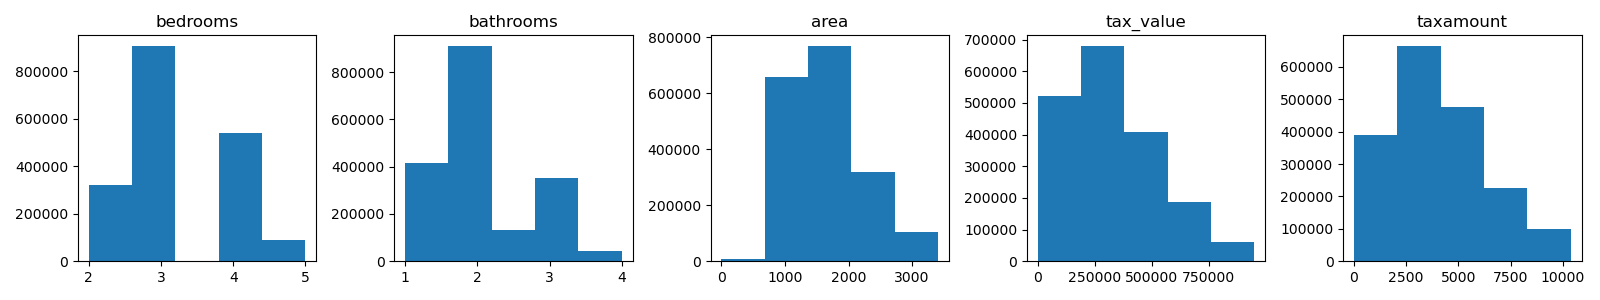

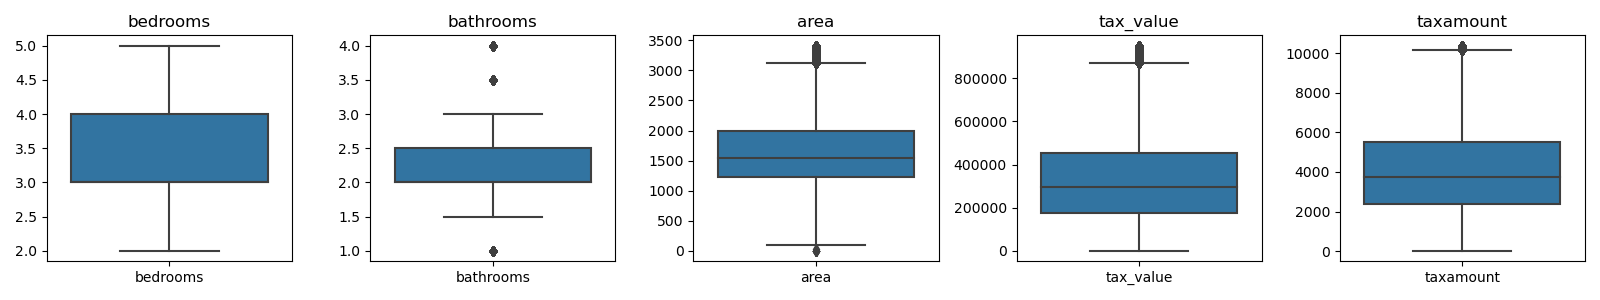

In [10]:
train, validate, test = wrangle_zillow.prepare_zillow(zillow)
trainsamp1 = train.sample(1000)

In [12]:
trainsamp1['age'] = 2023-trainsamp1['year_built']

In [13]:
trainsamp1

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
416994,3.0,3.0,1252.0,84460.0,1946.0,2028.90,6059.0,77.0
1106210,3.0,2.0,2156.0,699665.0,1957.0,7617.16,6059.0,66.0
1423101,4.0,2.0,1715.0,221643.0,1979.0,2797.47,6037.0,44.0
1725126,3.0,3.0,2289.0,198000.0,1973.0,3082.79,6037.0,50.0
1247299,4.0,2.0,1896.0,484748.0,1971.0,5281.64,6059.0,52.0
...,...,...,...,...,...,...,...,...
361751,2.0,1.0,1076.0,199550.0,1958.0,2511.03,6037.0,65.0
817192,5.0,3.0,2490.0,412280.0,1969.0,4260.82,6059.0,54.0
2099364,3.0,1.0,1586.0,341723.0,1905.0,4003.08,6111.0,118.0
1492656,3.0,1.0,1140.0,105187.0,1952.0,1561.02,6037.0,71.0


In [17]:
lr1 = LinearRegression()
lr1.fit(trainsamp1[['area']],trainsamp1.tax_value)
lr1.predict(trainsamp1[['area']])

array([265988.49835076, 415463.27088944, 342544.71481692, 437454.581451  ,
       372472.7389646 , 249122.98198025, 316750.39566202, 350646.77660276,
       313608.77986751, 306002.76268081, 341056.58101952, 240524.87559528,
       202825.48606118, 338080.31342473, 466059.82000099, 552040.88385067,
       350316.08020334, 258713.17756348, 442084.3310429 , 257390.39196579,
       287649.11251289, 343702.1522149 , 374622.26556084, 243666.49138979,
       475319.3191848 , 485901.6039663 , 221179.1362291 , 233249.554808  ,
       197534.34367044, 310136.46767358, 385369.89854205, 337914.96522502,
       291121.42470682, 232257.46560973, 195880.86167333, 585606.56839199,
       320884.10065479, 314104.82446664, 361559.75778368, 362551.84698195,
       323198.97545074, 407195.8609039 , 307821.59287763, 273263.81913804,
       303522.53968514, 243501.14319007, 287814.4607126 , 448036.8662325 ,
       258051.78476464, 284838.19311781, 246146.71438545, 343867.50041461,
       499294.80814289, 3